In [ ]:
pip install umap-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=4fcadbf9484f92bf0364faee68b0187c22f0fa80c8a963cc1adc08762dbae9ed
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=b6d192983ad581136e11abee018fb2e27d8db1a063ee5660390684d83aecf303
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
#import umap
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('HumanBreastCancerPatient1_cell_by_gene.csv')

print(df)

        cell  PDK4  CCL26  CX3CL1  PGLYRP1  CD4  SNAI2  TNFRSF17  ICAM3  \
0          0   2.0    0.0     5.0      0.0  0.0    0.0       1.0    0.0   
1          1   0.0    0.0     0.0      0.0  0.0    0.0       0.0    0.0   
2          2   1.0    0.0     2.0      0.0  0.0    0.0       0.0    0.0   
3          3   0.0    0.0     4.0      0.0  0.0    0.0       1.0    0.0   
4          4   0.0    0.0     0.0      0.0  0.0    0.0       1.0    0.0   
...      ...   ...    ...     ...      ...  ...    ...       ...    ...   
30294  30294   1.0    0.0     4.0      0.0  0.0    0.0       2.0    1.0   
30295  30295   0.0    0.0     1.0      0.0  0.0    0.0       0.0    0.0   
30296  30296   4.0    0.0     1.0      0.0  0.0    0.0       0.0    2.0   
30297  30297   0.0    0.0     0.0      0.0  0.0    0.0       0.0    1.0   
30298  30298   0.0    0.0     1.0      0.0  0.0    1.0       0.0    0.0   

       TBX21  ...  Blank-41  Blank-42  Blank-43  Blank-44  Blank-45  Blank-46  \
0        0.0  ... 

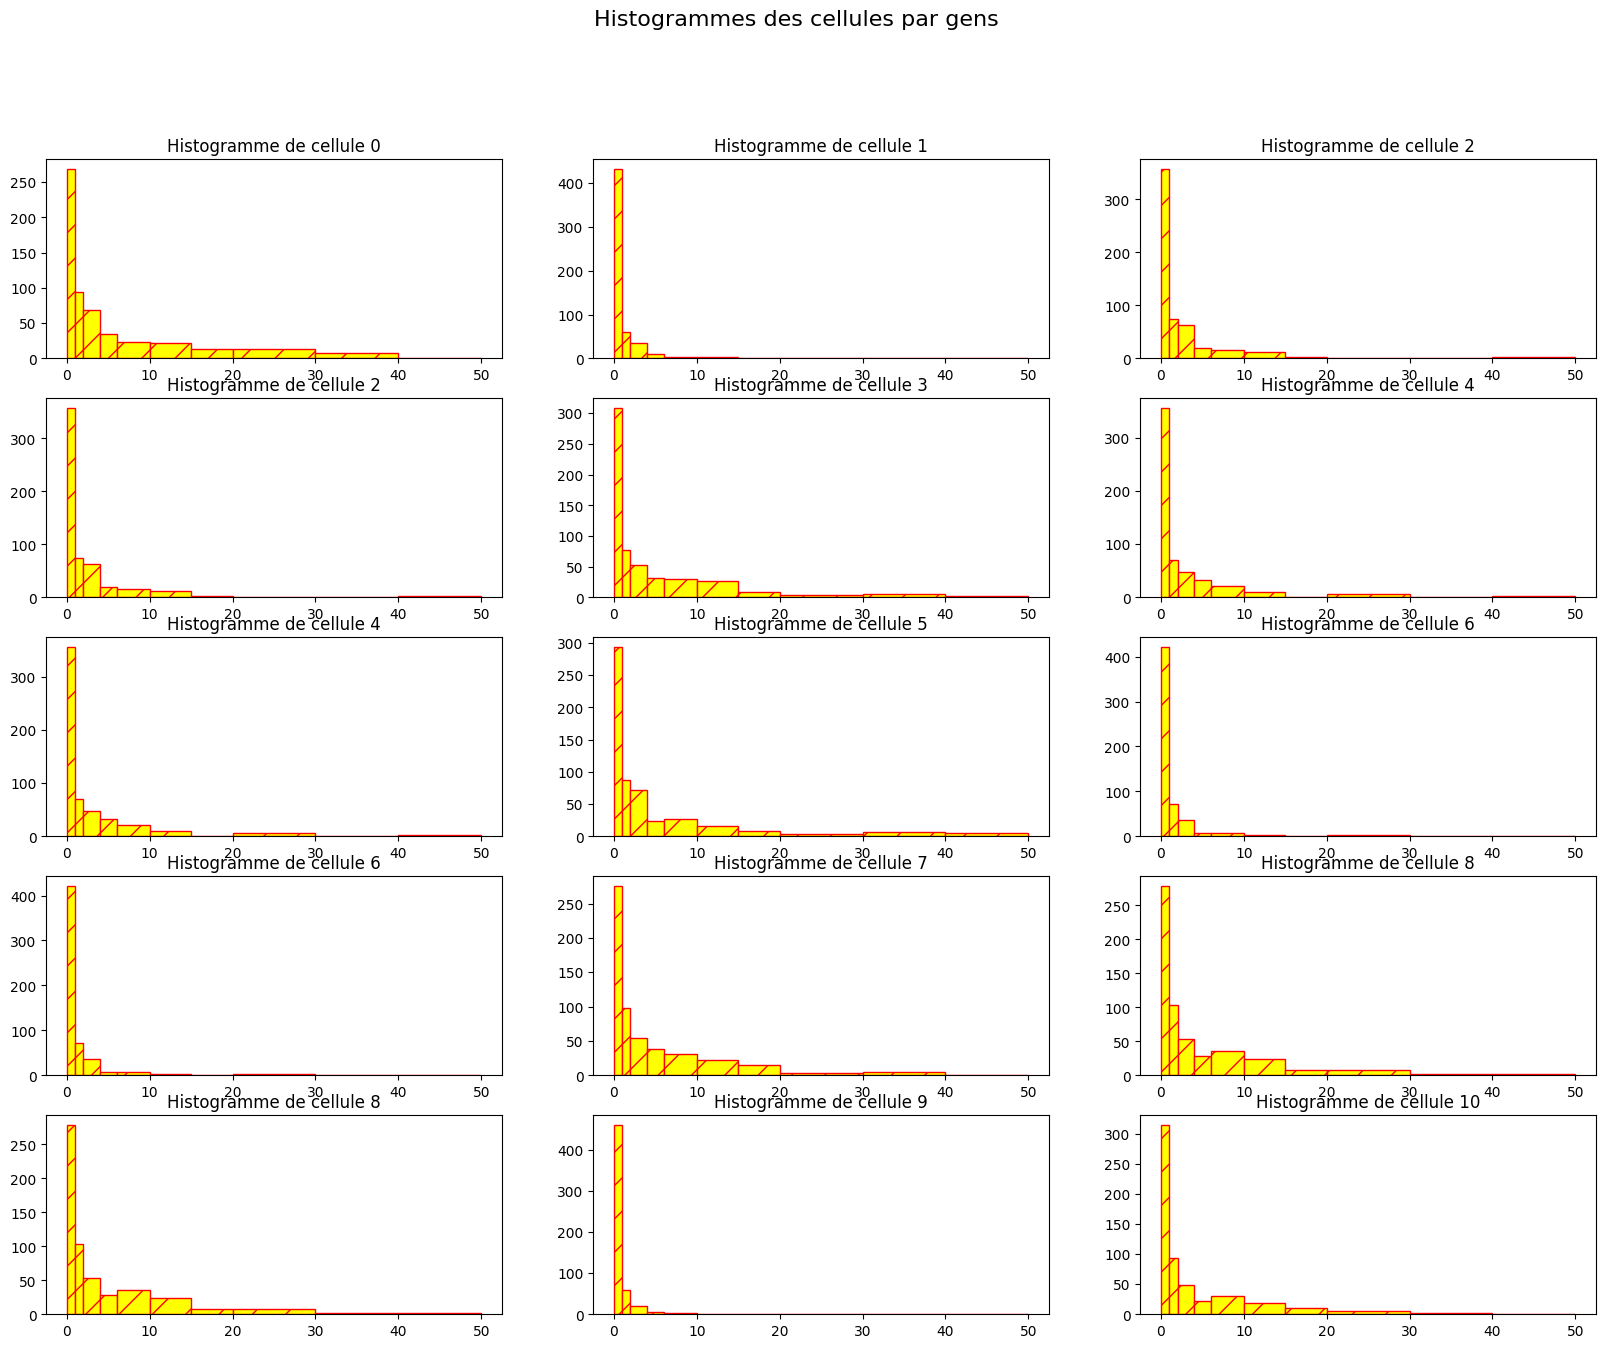

In [ ]:
nb_rows = 5
nb_cols = 3

fig, axs = plt.subplots(nrows=nb_rows, ncols=nb_cols, figsize=(20, 15))
plt.suptitle('Histogrammes des cellules par gens', fontsize=16)

j = 0
for i in range(nb_rows):
  for j in range(nb_cols):
    liste_cells = df.loc[i*2+j][1:550]
    max_cell = liste_cells.max()
    axs[i,j].hist(liste_cells, range=(0,max_cell), bins=[0,1,2,4,6,10,15,20,30,40,50], color = 'yellow',
              edgecolor = 'red', hatch = '/')
    axs[i,j].set_title('Histogramme de cellule ' + str(i*2+j))

plt.show()




In [ ]:
df.columns[0]

'cell'

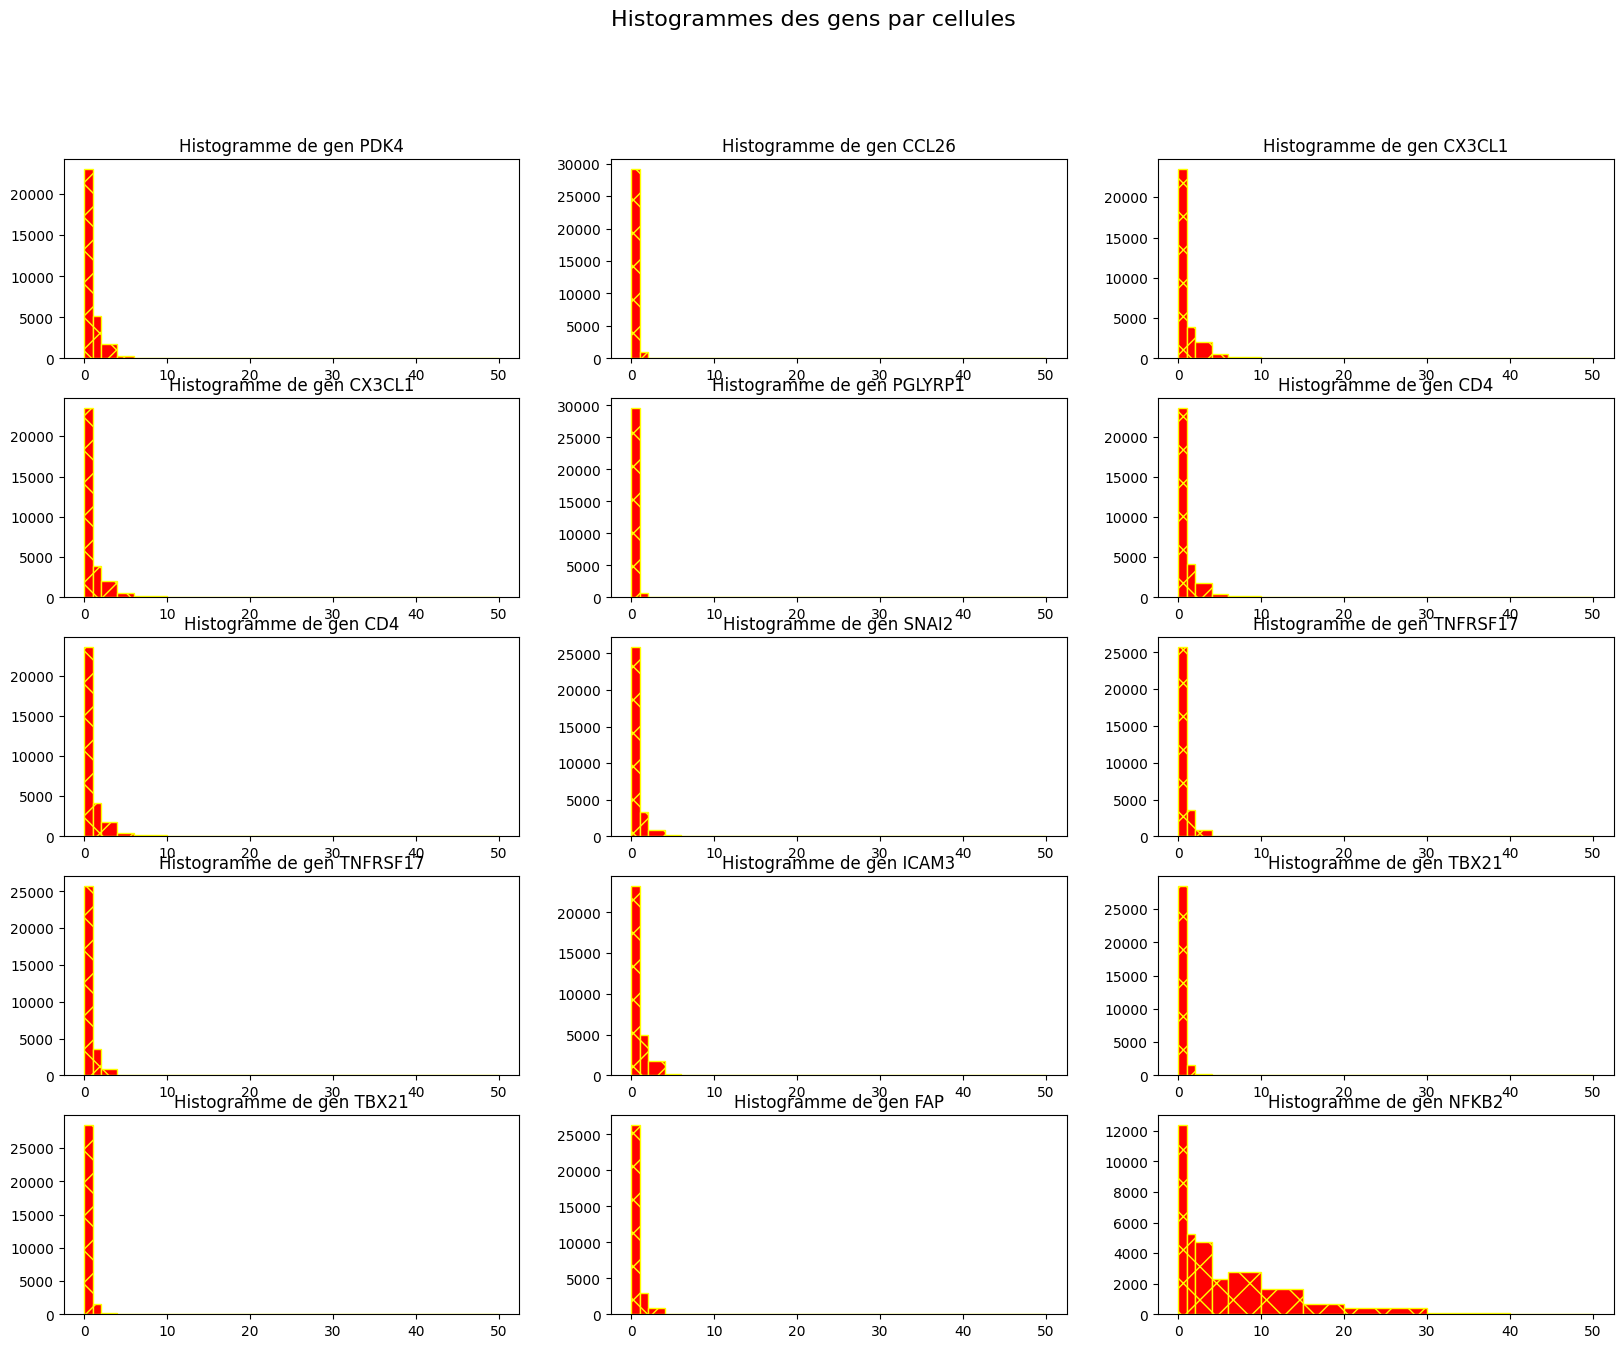

In [ ]:
nb_rows = 5
nb_cols = 3

fig, axs = plt.subplots(nrows=nb_rows, ncols=nb_cols, figsize=(20, 15))
plt.suptitle('Histogrammes des gens par cellules', fontsize=16)

j = 0
for i in range(nb_rows):
  for j in range(nb_cols):
    liste_gens = df.loc[:, df.columns[i*2+j+1]]
    max_gen = liste_gens.max()
    axs[i,j].hist(liste_gens, range=(0,max_gen), bins=[0,1,2,4,6,10,15,20,30,40,50], color = 'red',
              edgecolor = 'yellow', hatch = 'x')
    axs[i,j].set_title('Histogramme de gen ' + df.columns[i*2+j+1])

plt.show()

In [ ]:
nb_gens = df.shape[1]
print("Nombre de gens en total: " + str(nb_gens))

Nombre de gens en total: 551


In [ ]:
reducer = umap.UMAP(n_neighbors=3, min_dist=0.2)
embedding = reducer.fit_transform(df[10000:20000])

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
k = 15  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(embedding)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


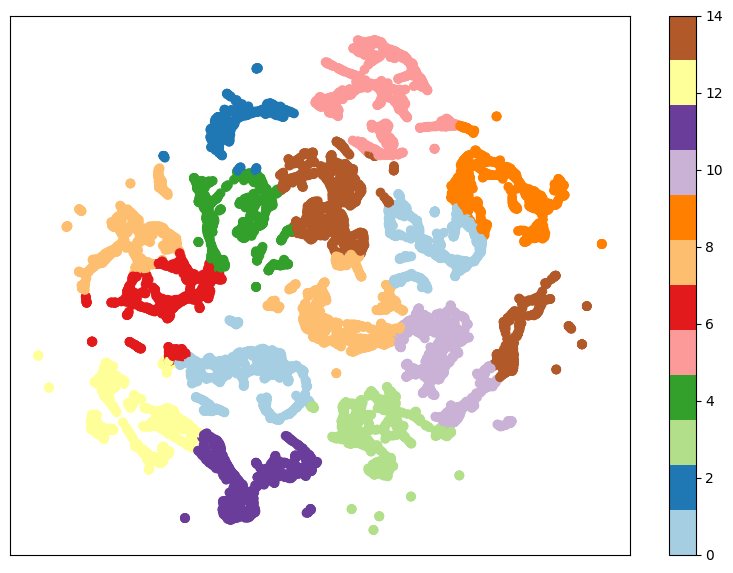

In [ ]:
# Affichage des résultats
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Paired')
plt.setp(ax, xticks=[], yticks=[])
plt.colorbar()
plt.show()